## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [10]:
!pip install pandas_datareader

You should consider upgrading via the 'C:\Users\ivana\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [ ]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime

start_date = datetime.datetime(2017, 1, 1)
end_date = datetime.datetime(2018, 12, 31)
symbols = ['AAPL']

data = pdr.DataReader(symbols[0], 'yahoo', start_date, end_date)
prices = data['Adj Close']

plt.figure(figsize=(16, 8))
plt.plot(prices)
plt.title(f'Цены акций {symbols[0]} с {start_date.strftime("%Y-%m-%d")} по {end_date.strftime("%Y-%m-%d")}')
plt.xlabel('Дата')
plt.ylabel('Цена ($)')
plt.show()

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

In [ ]:
import pandas_datareader as pdr
import numpy as np
import datetime

start_date = datetime.datetime(2017, 1, 1)
end_date = datetime.datetime(2018, 12, 31)
symbols = ['AAPL']

data = pdr.DataReader(symbols[0], 'yahoo', start_date, end_date)
max_prices = data['High']

mean_price = np.mean(max_prices)
std_price = np.std(max_prices)
upper_bound = mean_price + 3 * std_price

print(f"Средняя максимальная цена: {mean_price:.2f}")
print(f"Верхняя граница диапазона выбросов: {upper_bound:.2f}")

In [ ]:
outliers = [price for price in max_prices if price > upper_bound]
if len(outliers) > 0:
    print(f"Найдены выбросы: {outliers}")
else:
    print("Выбросов не найдено.")

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

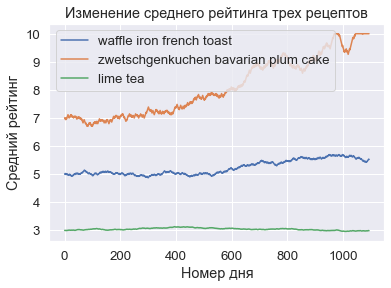

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных из файла numpy
data = np.load('average_ratings.npy')

# Определение имен рецептов
recipe_names = ["waffle iron french toast", "zwetschgenkuchen bavarian plum cake", "lime tea"]

# Построение графика
fig, ax = plt.subplots()
for i in range(3):
    ax.plot(data[i], label=recipe_names[i])

# Настройка меток и заголовка графика
ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')

# Добавление легенды и отображение графика
ax.legend()
plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


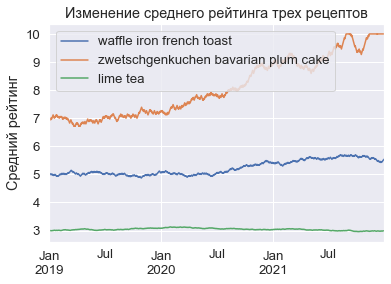

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Загрузка данных из файла numpy
ratings = np.load('average_ratings.npy')

# Создание DataFrame с данными о рейтингах
dates = pd.date_range('2019-01-01', periods=ratings.shape[1], freq='D')
df = pd.DataFrame(ratings.T, index=dates, columns=["waffle iron french toast", "zwetschgenkuchen bavarian plum cake", "lime tea"])

# Построение графика
fig, ax = plt.subplots()
df.plot(ax=ax)

# Настройка меток и заголовка графика
ax.set_title("Изменение среднего рейтинга трех рецептов")
ax.set_ylabel("Средний рейтинг")
ax.legend()

# Отображение графика
plt.show()


C:\Users\ivana\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3251: UserWarning: Parsing '30/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


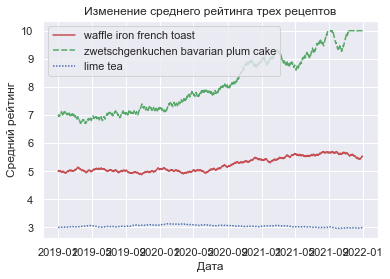

In [74]:
#второй способ с seaborn 
import numpy as np
import seaborn as sns
import pandas as pd

# Загрузка данных из файла numpy
ratings = np.load('average_ratings.npy')

# Создание DataFrame с данными о рейтингах
dates = pd.date_range(start='1/1/2019', end='30/12/2021')
df = pd.DataFrame(ratings.T, index=dates, columns=["waffle iron french toast", "zwetschgenkuchen bavarian plum cake", "lime tea"])

# Построение графиков
sns.set(style="darkgrid")
sns.lineplot(data=df, palette=["r", "g", "b"])

# Настройка меток и заголовков графиков
plt.title("Изменение среднего рейтинга трех рецептов")
plt.xlabel("Дата")
plt.ylabel("Средний рейтинг")

# Отображение графиков
plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

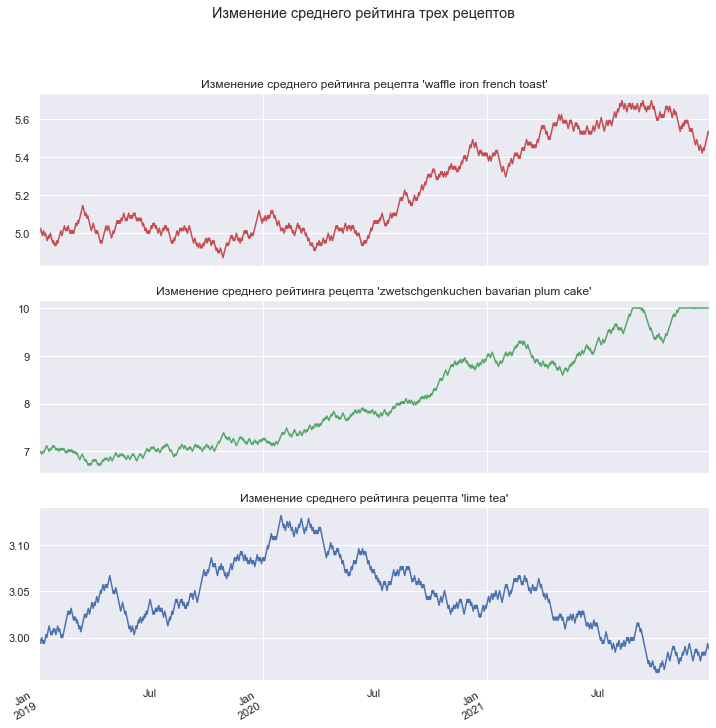

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Загрузка данных из файла numpy
ratings = np.load('average_ratings.npy')

# Создание DataFrame с данными о рейтингах
dates = pd.date_range(start='1/1/2019', end='30/12/2021')
df = pd.DataFrame(ratings.T, index=dates, columns=["waffle iron french toast", "zwetschgenkuchen bavarian plum cake", "lime tea"])

# Построение графиков
fig, axs = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
df["waffle iron french toast"].plot(ax=axs[0], color='r', legend=False)
df["zwetschgenkuchen bavarian plum cake"].plot(ax=axs[1], color='g', legend=False)
df["lime tea"].plot(ax=axs[2], color='b', legend=False)

# Настройка меток и заголовков графиков
axs[0].set_title("Изменение среднего рейтинга рецепта 'waffle iron french toast'")
axs[1].set_title("Изменение среднего рейтинга рецепта 'zwetschgenkuchen bavarian plum cake'")
axs[2].set_title("Изменение среднего рейтинга рецепта 'lime tea'")
fig.suptitle("Изменение среднего рейтинга трех рецептов")

# Настройка меток на оси x
fig.autofmt_xdate()

# Отображение графиков
plt.show()


4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


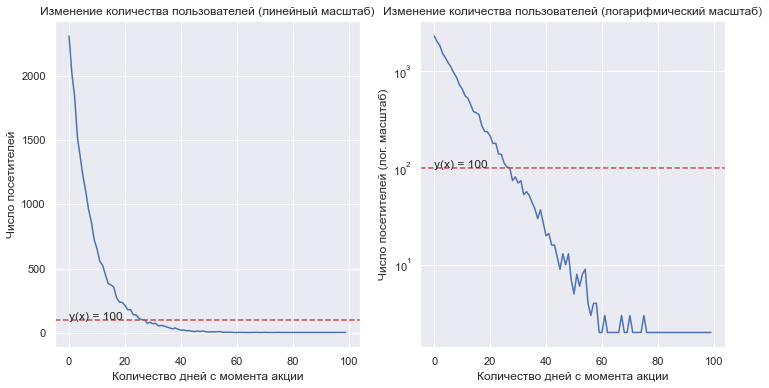

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных из файла numpy
visitors = np.load('visitors.npy')

# Настройка графиков
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
x = np.arange(len(visitors))
y = visitors

# Построение графика с линейной осью y
ax1.plot(x, y, '-')
ax1.set_title("Изменение количества пользователей (линейный масштаб)")
ax1.set_xlabel("Количество дней с момента акции")
ax1.set_ylabel("Число посетителей")
ax1.axhline(y=100, color='r', linestyle='--')
ax1.text(0, 100, "y(x) = 100")

# Построение графика с логарифмической осью y
ax2.semilogy(x, y, '-')
ax2.set_title("Изменение количества пользователей (логарифмический масштаб)")
ax2.set_xlabel("Количество дней с момента акции")
ax2.set_ylabel("Число посетителей (лог. масштаб)")
ax2.axhline(y=100, color='r', linestyle='--')
ax2.text(0, 100, "y(x) = 100")

# Отображение графиков
plt.show()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [78]:
reviews = ...
recipes = ...

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

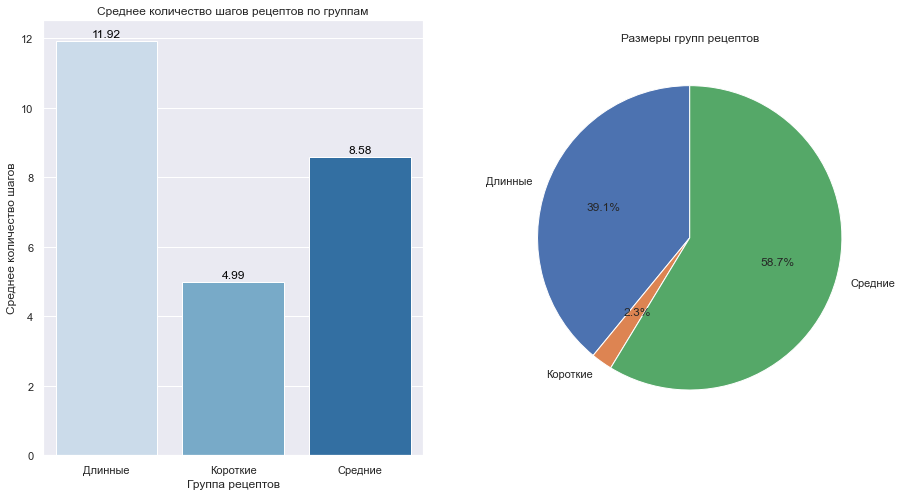

In [79]:
import pandas as pd
import seaborn as sns

reviews = pd.read_csv('reviews_sample.csv')
recipes = pd.read_csv('recipes_sample.csv')
conditions = [    (recipes['minutes'] < 5),
    (recipes['minutes'] >= 5) & (recipes['minutes'] < 50),
    (recipes['minutes'] >= 50)
]
values = ['Короткие', 'Средние', 'Длинные']
recipes['duration_category'] = pd.Series(np.select(conditions, values))
grouped_recipes = recipes.groupby('duration_category').agg({'n_steps': 'mean', 'minutes': 'count'})
grouped_recipes.columns = ['mean_n_steps', 'recipe_count']
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 8))

# Столбчатая диаграмма среднего количества шагов
sns.barplot(x=grouped_recipes.index, y='mean_n_steps', data=grouped_recipes, palette='Blues', ax=ax1)
ax1.set_xlabel('Группа рецептов')
ax1.set_ylabel('Среднее количество шагов')
ax1.set_title('Среднее количество шагов рецептов по группам')

# Добавляем подписи с средним количеством шагов над каждым столбиком
for i, v in enumerate(grouped_recipes['mean_n_steps']):
    ax1.text(i, grouped_recipes['mean_n_steps'][i] + 0.1, str(round(v, 2)), color='black', ha='center')

# Круговая диаграмма размеров групп рецептов
sns.set_palette('Pastel1')
sns.set_style('whitegrid')
ax2.pie(grouped_recipes['recipe_count'], labels=grouped_recipes.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Размеры групп рецептов')

# Отображение графиков
plt.show()

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

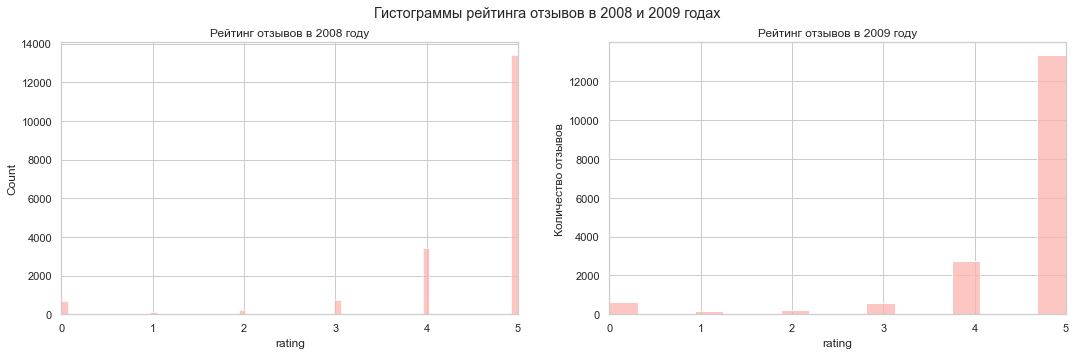

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка и фильтрация набора данных отзывов
reviews = pd.read_csv('reviews_sample.csv')
reviews = reviews[reviews['date'].str.contains('2008|2009')]

# Создание графика с двумя подграфиками
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,5))

# Построение гистограммы рейтинга отзывов за 2008 год
sns.histplot(data=reviews[reviews['date'].str.contains('2008')], x='rating', ax=axes[0])
axes[0].set_title('Рейтинг отзывов в 2008 году')
axes[0].set_xlim([0, 5])

# Построение гистограммы рейтинга отзывов за 2009 год
sns.histplot(data=reviews[reviews['date'].str.contains('2009')], x='rating', ax=axes[1])
axes[1].set_title('Рейтинг отзывов в 2009 году')
axes[1].set_xlim([0, 5])
axes[1].set_ylabel('Количество отзывов')

# Добавление общего заголовка для графика
fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')

# Отображение графика
plt.show()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

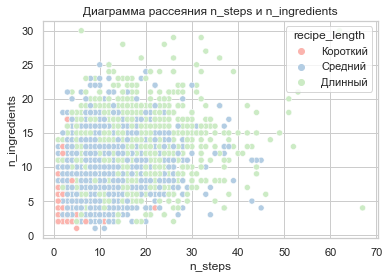

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создание нового столбца "recipe_length" с помощью метода cut()
recipes['recipe_length'] = pd.cut(recipes['minutes'], bins=[0, 5, 50, float('inf')], labels=['Короткий', 'Средний', 'Длинный'])

# Создание диаграммы рассеяния с помощью метода scatterplot() из Seaborn
sns.scatterplot(data=recipes, x='n_steps', y='n_ingredients', hue='recipe_length')

# Настройка заголовка и осей диаграммы
plt.title('Диаграмма рассеяния n_steps и n_ingredients')
plt.xlabel('n_steps')
plt.ylabel('n_ingredients')

# Отображение диаграммы рассеяния
plt.show()


8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

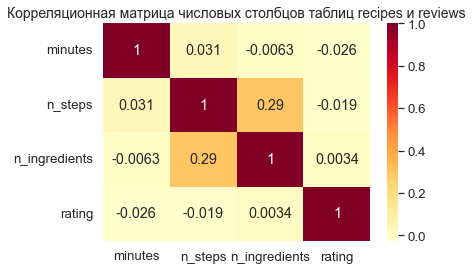

In [83]:
import pandas as pd
import seaborn as sns

# загрузка данных
reviews = pd.read_csv('reviews_sample.csv')
recipes = pd.read_csv('recipes_sample.csv')

# объединение таблиц
recipes_reviews = pd.merge(recipes, reviews, left_on='id', right_on='recipe_id')

# выбор числовых столбцов
numeric_cols = ['minutes', 'n_steps', 'n_ingredients', 'rating']
recipes_reviews_numeric = recipes_reviews[numeric_cols]

# вычисление корреляционной матрицы
corr_matrix = recipes_reviews_numeric.corr()

# создание тепловой карты
sns.set(style='white')
sns.set(font_scale=1.2)
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')

# добавление заголовка
heatmap.set_title('Корреляционная матрица числовых столбцов таблиц recipes и reviews', fontsize=14)

# отображение тепловой карты
plt.show()